General notes:
look into movies that are less expensive. This might be a way to limit capital risk if Microsoft doesn't want to go super hard into the investment. 
look at distribution of the top grossing files. Maybe give them a distribution of files to go for, show which ones will have pretty reliable income and which ones are the longshots but have huge payoff potential. 

imports os and glob
use pd.merge

<h1>
    Mircosoft: Taping into the movie industry
</h1>
<h5>
    Prepared by: Michael Mahoney
</h5>

* Student pace:  part time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:

<h1>
    Introduction:
</h1>
<p>
This notebook marks an initial exploratory investigation of the movie industry on behalf of Microsoft. It contains the technical analysis and source code for which I base my recomendations. A copy of this notebook will be provided in the requested format for future use and/or investigation should Microsoft endeavor to insert themselves in the move market.
</p>
<p>
    There is a liberal use of markdown in this notebook for the purpose of elusidating my thought process during the investigation. In general, comments in the code are reserved for technical python notes and not the methodology of the investigation.
</p>


In [1]:
#dependancies in this notebook

from IPython.display import display, Markdown, Latex
import matplotlib.ticker as tick
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns
plt.style.use('fivethirtyeight')


The following cell contains pandas options for how much info is displayed for DataFrames. We have set the columns to display all and the rows are unaltered. If you want to see all entries, uncomment the second line. 

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

<h1>
    Cleaning the data:
</h1>
<p>
    As with all data analysis, we begin by understanding and cleaning the data. 
</p>
<br>

In [3]:
#import the files from the local repo
dfBomGross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
dfimdbName = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
dfimdbTitleBasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
dfimdbTitleCrew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
dfimdbTitlePrincipals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
dfimdbTitleRatings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
dfRtMovie = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t')
dfRtReviews = pd.read_csv('zippedData/rt.reviews.tsv.gz',sep='\t', encoding='latin_1')
dfTmbd = pd.read_csv('zippedData/tmdb.movies.csv.gz')
dfTn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

#We add column headers to this file which was missing them
dfimdbTitleAkas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
columns = list(dfimdbTitleAkas.columns)
columns[0] = 'tconst'
dfimdbTitleAkas.columns = columns

#Display first row of all DataFrames to get a first look at the data structures
listOfDfs = [dfBomGross, dfimdbName, dfimdbTitleAkas, dfimdbTitleBasics, dfimdbTitleCrew, dfimdbTitlePrincipals, dfimdbTitleRatings, dfRtMovie, dfRtReviews, dfTmbd, dfTn]
for x in listOfDfs:
    display(x.head(1))
print('\n')

title studio  domestic_gross foreign_gross  year
0  Toy Story 3     BV     415000000.0     652000000  2010

nconst       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   

                          primary_profession  \
0  miscellaneous,production_manager,producer   

                          known_for_titles  
0  tt0837562,tt2398241,tt0844471,tt0118553

tconst  ordering          title region language types attributes  \
0  tt0369610        10  Джурасик свят     BG       bg   NaN        NaN   

   is_original_title  
0                0.0

tconst primary_title original_title  start_year  runtime_minutes  \
0  tt0063540     Sunghursh      Sunghursh        2013            175.0   

               genres  
0  Action,Crime,Drama

tconst  directors    writers
0  tt0285252  nm0899854  nm0899854

tconst  ordering     nconst category  job   characters
0  tt0111414         1  nm0246005    actor  NaN  ["The Man"]

tconst  averagerating  numvotes
0  tt10356526            8.3        31

id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   

                                 genre          director          writer  \
0  Action and Adventure|Classics|Drama  William Friedkin  Ernest Tidyman   

  theater_date      dvd_date currency box_office      runtime studio  
0  Oct 9, 1971  Sep 25, 2001      NaN        NaN  104 minutes    NaN

id                                             review rating  fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5  fresh   

       critic  top_critic        publisher               date  
0  PJ Nabarro           0  Patrick Nabarro  November 10, 2018

Unnamed: 0        genre_ids     id original_language  \
0           0  [12, 14, 10751]  12444                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788

id  release_date   movie production_budget domestic_gross worldwide_gross
0   1  Dec 18, 2009  Avatar      $425,000,000   $760,507,625  $2,776,345,279

<br>
<p>
    We see from the above cell that the various parts of our working data are in disarray in terms for formatting and usefulness. Thinking about our ultimate goal, every business centers around the basic premise of profitability (or operational sustainability for those non-profits out there). To that end, any real discussion of how to best enter the movie industry begins with money. Two of our data sources have this information. 
</p>
<br>
<br>

In [4]:
dfTn.info()
dfBomGross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memor

<br>
<br>
We do a quick check to see if the information overlaps and how well.
<br>
<br>

In [5]:
df2 = dfTn.merge(dfBomGross, how = 'left', left_on='movie', right_on = 'title')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   object 
 4   domestic_gross_x   5782 non-null   object 
 5   worldwide_gross    5782 non-null   object 
 6   title              1247 non-null   object 
 7   studio             1246 non-null   object 
 8   domestic_gross_y   1245 non-null   float64
 9   foreign_gross      1086 non-null   object 
 10  year               1247 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 542.1+ KB


<br>
<br>
    From the info method we see that essentially all the information in dfBomGross is encapsulated by dfTn, therefore we can abandon the join and use dfTn directly. Not to mention dfTn has substantially more accuracy in terms of the numbers themselves. 
   <br>
   <br>

In [6]:
df2 = dfTn.copy()
df2.head(1)

id  release_date   movie production_budget domestic_gross worldwide_gross
0   1  Dec 18, 2009  Avatar      $425,000,000   $760,507,625  $2,776,345,279

<br>
dfTn does, however, have a substantial amount of formatting issues which we fix in the following cell. 

In [7]:

# convert various columns object data to int data for analysis
df2['domestic_gross'] = [x.replace(',','').replace('$','') for x in df2['domestic_gross']]
df2['domestic_gross'] = df2['domestic_gross'].astype('int64')
df2['worldwide_gross'] = [x.replace(',','').replace('$','') for x in df2['worldwide_gross']]
df2['worldwide_gross'] =df2['worldwide_gross'].astype('int64')
df2['production_budget'] = [x.replace(',','').replace('$','') for x in df2['production_budget']]
df2['production_budget'] =df2['production_budget'].astype('int64')

# Add a new column for profit 
df2['profit'] = (df2['worldwide_gross'] - df2['production_budget'])
df2['profit'] = df2['profit'].astype('float64')
#Change release date to a useable datetime format and add some more columns for easier access
df2['release_date'] = pd.to_datetime(df2['release_date'])
df2['release_year'] = pd.DatetimeIndex(df2['release_date']).year
df2['release_month'] = pd.DatetimeIndex(df2['release_date']).month
df2['release_day'] = pd.DatetimeIndex(df2['release_date']).weekday
# df2 = df2.merge(dfInfo, how = 'left', left_on = 'movie', right_on = 'primary_title')
df2.head(1)

id release_date   movie  production_budget  domestic_gross  \
0   1   2009-12-18  Avatar          425000000       760507625   

   worldwide_gross        profit  release_year  release_month  release_day  
0       2776345279  2.351345e+09          2009             12            4


<br>
<p>
    Looking at this structure, it's clear that joining tables with only financial information isn't going to give much insight as to why movies fiscally perform the way they do. For the sake of saving time later, I'm going to combine all of the IMDB info here and use the names of the movies we do have income information on to sort through the IMDB list which is much more complete in terms of information.
</p>

In [8]:
#check data frame method keys. Use x.columns
# With the exception of dfimdbName, all IMDB dataframes have a common primary key which we use to join them

#The following code changes all 'tconst' columns into a common data type
listOfImdbDfs = [dfimdbTitleAkas,dfimdbTitleBasics,dfimdbTitleCrew,dfimdbTitlePrincipals,dfimdbTitleRatings]
for x in listOfImdbDfs:
    if('tconst' in x.keys()):
        x['tconst'] = x['tconst'].astype('str')

# We define a function to make the joining a little easier
def joinThings(df1, df2):
    df = df1.merge(df2,how='left',left_on='tconst', right_on='tconst')
    return df

# This is still messy and could use some love
df = joinThings(joinThings(joinThings(joinThings(dfimdbTitleAkas,dfimdbTitleBasics),dfimdbTitleCrew),dfimdbTitlePrincipals),dfimdbTitleRatings)
display(df.head(1), df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2841276 entries, 0 to 2841275
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   tconst             object 
 1   ordering_x         int64  
 2   title              object 
 3   region             object 
 4   language           object 
 5   types              object 
 6   attributes         object 
 7   is_original_title  float64
 8   primary_title      object 
 9   original_title     object 
 10  start_year         int64  
 11  runtime_minutes    float64
 12  genres             object 
 13  directors          object 
 14  writers            object 
 15  ordering_y         float64
 16  nconst             object 
 17  category           object 
 18  job                object 
 19  characters         object 
 20  averagerating      float64
 21  numvotes           float64
dtypes: float64(5), int64(2), object(15)
memory usage: 498.6+ MB


tconst  ordering_x          title region language types attributes  \
0  tt0369610          10  Джурасик свят     BG       bg   NaN        NaN   

   is_original_title   primary_title  original_title  start_year  \
0                0.0  Jurassic World  Jurassic World        2015   

   runtime_minutes                   genres  directors  \
0            124.0  Action,Adventure,Sci-Fi  nm1119880   

                                             writers  ordering_y     nconst  \
0  nm0415425,nm0798646,nm1119880,nm2081046,nm0000341        10.0  nm0189777   

   category       job characters  averagerating  numvotes  
0  producer  producer        NaN            7.0  539338.0

None

<br>
<p>
    This information is much more juicy in terms of disecting movie performace. However, there's more work to be done eliminating bad data so we will have something manageable to merge into our financial information. Let's begin by taking a look at which columns or rows we should think about dropping. 
</p>
<br>

In [9]:
#percentage of null values per column
df.isna().sum()/len(df)*100

tconst                0.000000
ordering_x            0.000000
title                 0.000000
region               16.217010
language             86.635406
types                45.353954
attributes           95.215143
is_original_title     0.000880
primary_title         0.000000
original_title        0.000458
start_year            0.000000
runtime_minutes       7.938300
genres                0.864154
directors             0.494531
writers               8.058492
ordering_y            0.034914
nconst                0.034914
category              0.034914
job                  74.427933
characters           61.141156
averagerating        14.711594
numvotes             14.711594
dtype: float64

<br>
<p>
    This informs the following cell in which we dump either incomplete or eteraneous data from df. I want to note at this point that I will not be removing averagerating despite the high percentage of missing data. This is becuase the average rating appears to be at the heart of commercial success and we have enough information to be able to lose .
</p>
<br>

In [10]:
df.drop(columns = ['language', 'types', 'attributes', 'job', 'characters','category', 'ordering_y', 'ordering_x', 'nconst', 'is_original_title', 'region', 'title', 'original_title'], inplace = True)

<br>
<br>
<p>
    A subtle outcome that I want to bring attention to is a standard, but significant, consequence of collapsing dimensional data. Thousands of the rows in the combined IMDB dataframe have been reduced to duplicates which will be shown and removed in the following cell.
</p>
<br>

In [11]:
# We display the shape of the dataframe before and after dropping columns
display(df.shape)
df['duplicated'] = df.duplicated()
df = df.drop(df.loc[df['duplicated']].index)
display(df.shape)

(2841276, 9)

(122302, 10)


<br>
<p>
     Because the very large df dataframe is going to be merged into the much smaller df2 dataframe, it might seem acedemic that we've reduced the df dataframe by 100,000 entries. But this is very important for the joining process which would otherwise be much more likely to have critical and hard to detect errors if the duplicates remained. With those removed, we can go ahead and join this into our financial data
</p>
<br>

In [12]:
listOfNames = [x for x in df2.movie.unique()]
def test(x):
    if x in listOfNames:
        return True
    else:
        return False
df['inDf2'] = df['primary_title'].isin(listOfNames)
dfInfo = df.loc[df['inDf2']]
dfFinal = df2.merge(dfInfo, how = 'left', left_on = 'movie', right_on = 'primary_title')



<h1>
    Question 1
</h1>

<h2>How much should you spend on making a movie</h2>

In [13]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

0.6060881813278928

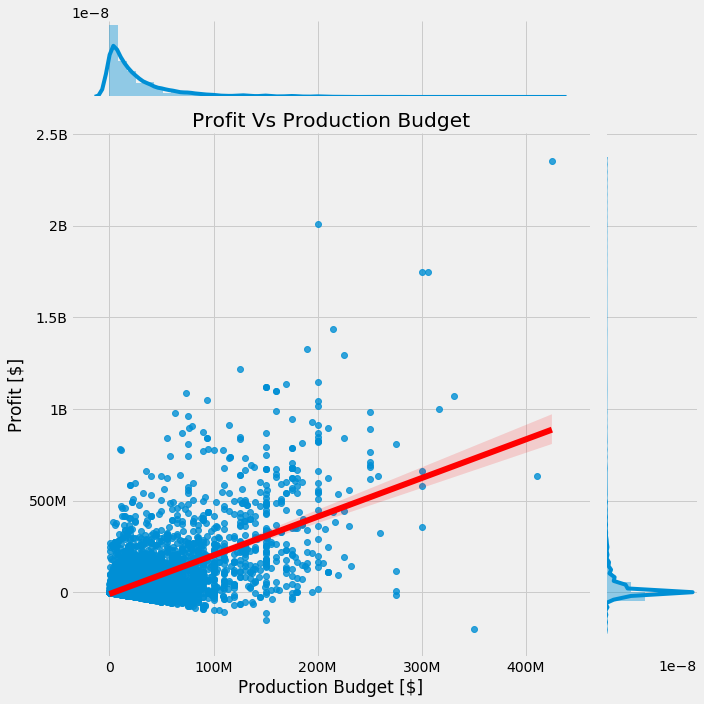

In [14]:
display(np.corrcoef(dfFinal['production_budget'], dfFinal['profit'])[0][1])

sns.jointplot(x = 'production_budget', y ='profit', data = dfFinal, height = 10, kind = 'reg' ,joint_kws = {'line_kws' : {'color':'red'}});
ax = plt.gca();
ax.set_title("Profit Vs Production Budget");
ax.set_xlabel('Production Budget [$]')

ax.set_ylabel('Profit [$]')
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.tight_layout()


<p>
    Notice the positive correlation of <strong>0.606</strong>. This is highly significant the strongest positive relationship found with Protit out of all the numerical columns. But what does this mean in terms scale?
</p>
<br>
In the next cell we calculate the quartiles, or percentage thresholds to see for what production budgets yield the greatest profits industry wide.
<br>

production   profits
0.00       1100.0  1.000000
0.05     500000.0  0.994683
0.10    1000000.0  0.990041
0.15    2000000.0  0.985248
0.20    3200000.0  0.974985
0.25    5000000.0  0.948195
0.30    6500000.0  0.940437
0.35    9000000.0  0.924737
0.40   11000000.0  0.899568
0.45   14000000.0  0.874119
0.50   16000000.0  0.850402
0.55   20000000.0  0.801023
0.60   24000000.0  0.784709
0.65   27500000.0  0.758118
0.70   32500000.0  0.715624
0.75   40000000.0  0.656578
0.80   50000000.0  0.607609
0.85   60000000.0  0.555364
0.90   79440000.0  0.473875
0.95  120000000.0  0.334809
1.00  425000000.0  0.000000

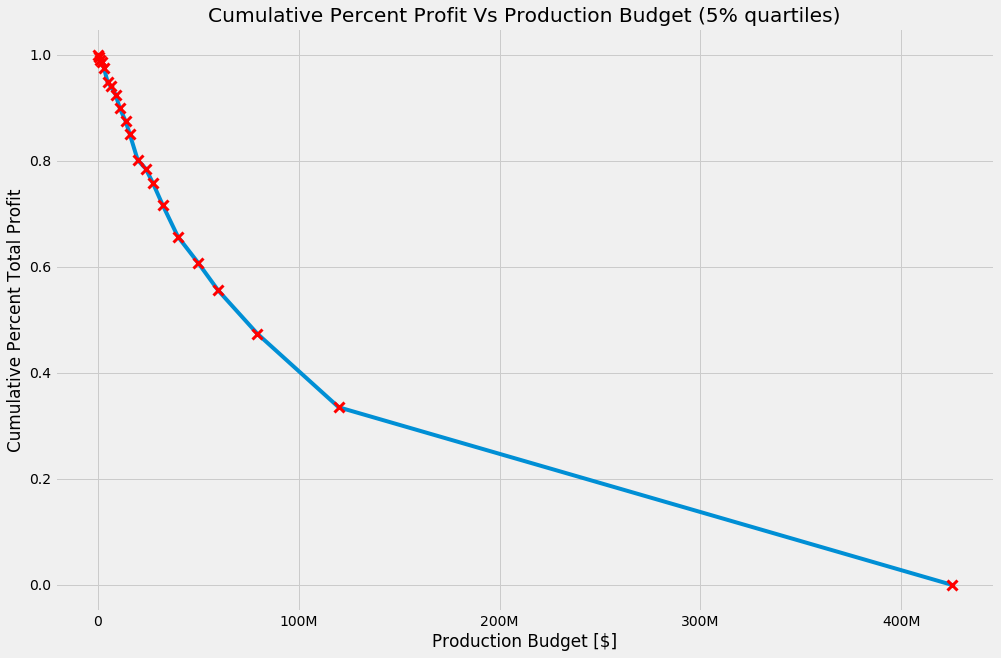

In [15]:
def percentProfit(array):
    quartileValues = dfFinal['production_budget'].quantile(array)
    profits = [dfFinal.loc[dfFinal['production_budget'] > x]['profit'].sum()/dfFinal['profit'].sum() for x in quartileValues]
    profitsDiff = [profits[i-1] - profits[i] for i in range(len(profits))]
    df = pd.DataFrame([])
    df['production'] = quartileValues
    df['profits'] = profits
    df['profits'][0] = 1
    display(df)
    return df

test = percentProfit([0,.05,.1,.15, .2,.25, .3,.35, .4,.45, .5,.55, .6,.65, .7,.75, .8,.85, .9,.95, 1])
fig = plt.figure(figsize=(15,10))
ax = sns.lineplot(data = test, x = 'production', y = 'profits',marker = 'x', markersize = 10, markerfacecolor = 'red', 
                  markeredgecolor = 'red', markeredgewidth = 3)
ax.set_title("Cumulative Percent Profit Vs Production Budget (5% quartiles)");
ax.set_xlabel('Production Budget [$]')
ax.set_ylabel('Cumulative Percent Total Profit')
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

# type(dfFinal['production_budget'].quantile([.8,.9]))

<h2>
    Answer for Question 1:
</h2>
In general production budget is strongly related to a movie's financial performance as shown by the correlation. Now when looking at how this trend breaks down on spending lines we see that the top 5% of high budget movies make more than 30% of the industry's money. Becuase of this <strong>I recomend allocating at least 120 million for production budget to be in the top 5%</strong>




<h1>
    Question 2
</h1>
<br>
<h2>What are the most profitable Genres?</h2>
<br>
<br>

In [16]:
#first we are going to re-add some of the info we dropped for the average rating analysis. 
listOfNames = [x for x in df2.movie.unique()]
def test(x):
    if x in listOfNames:
        return True
    else:
        return False
df['inDf2'] = df['primary_title'].isin(listOfNames)
dfInfo = df.loc[df['inDf2']]
dfFinal = df2.merge(dfInfo, how = 'left', left_on = 'movie', right_on = 'primary_title')

We are doing something non-standard in the following cells. Because the genre column contains multiple genres per cell
 we are going to use prime numbers in order to retain this information in an accesible way.

In [17]:
# we are doing something non-standard. Because the genre column contains multiple genres per cell
# we are going to use prime numbers in order to retain this information in an accesible way. 
# We first create a list of primes to assign to our different genres
def isPrime(num):
    test = [num % x != 0 for x in range(2,num)]
    if all(test):
        return num
primes = []   
for x in range(2, 1000):
    if isPrime(x):
        primes.append(isPrime(x))


In [18]:
# find all the unique genres in the genres column
dfFinal['genres'] = dfFinal['genres'].astype('str')

genresList = []
for x in dfFinal['genres']:
    temp = x.lower().strip().split(',')
    for i in temp:
        if i in genresList:
            continue
        else:
            genresList.append(i)
            
# Create a dictionary that assigns primes to each of the unique genres
genresDict = {genresList[i]:primes[i] for i in range(len(genresList))}

# Split the genres column up in order to assign primes
dfFinal['genres'] = [x.strip().lower().split(',') for x in dfFinal['genres']]

# Fuction that multiplies all the primes together
def productFunc(array):
    runningTotal = 1
    for x in array:
        runningTotal = runningTotal*genresDict[x]
    return runningTotal

# Create the genre code column and add some true false columns for slicing later
dfFinal['genresCode'] = [productFunc(x) for x in dfFinal['genres']]  
dfFinal.head(1)

# http://jonathansoma.com/lede/data-studio/classes/small-multiples/long-explanation-of-using-plt-subplots-to-create-small-multiples/



id release_date   movie  production_budget  domestic_gross  \
0   1   2009-12-18  Avatar          425000000       760507625   

   worldwide_gross        profit  release_year  release_month  release_day  \
0       2776345279  2.351345e+09          2009             12            4   

      tconst primary_title  start_year  runtime_minutes    genres  directors  \
0  tt1775309        Avatar      2011.0             93.0  [horror]  nm3786927   

               writers  averagerating  numvotes duplicated inDf2  genresCode  
0  nm2179863,nm4392664            6.1      43.0      False  True           2

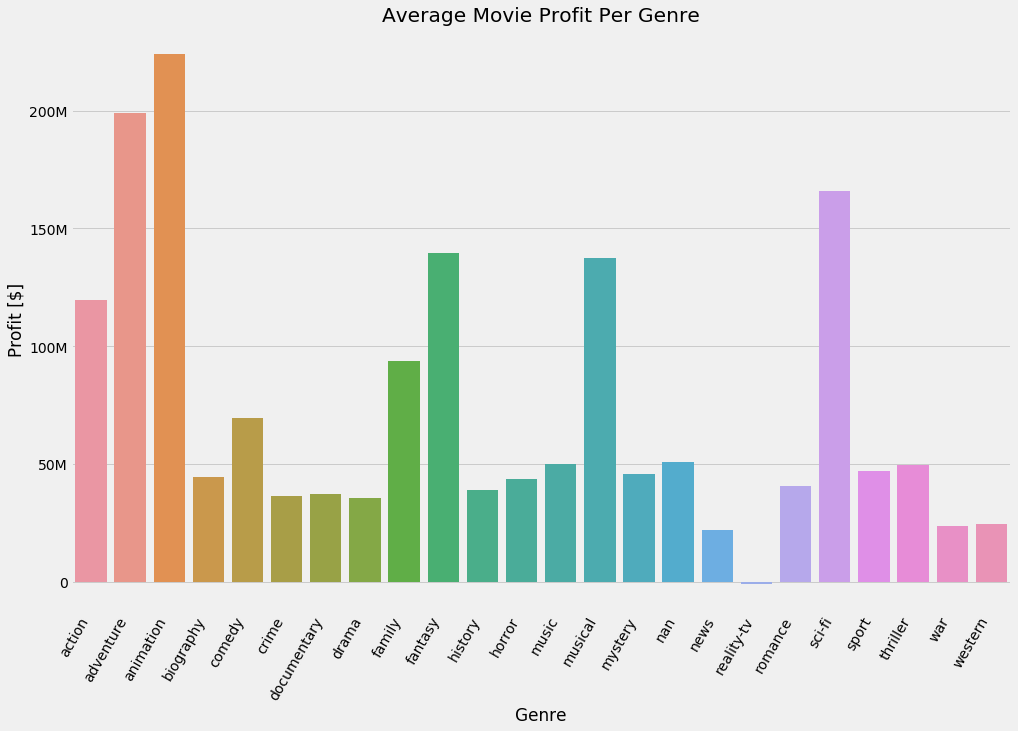

In [19]:
def createAThing(df):
    plotnumber = 1
    fig = plt.figure(figsize=(15,10))
    x= sorted(list(genresDict.keys()), reverse = False)
    y =[dfFinal.loc[dfFinal['genresCode'] % genresDict[x] == 0]['profit'].mean() for x in x]
    ax = sns.barplot(x, y, ax = plt.subplot(1,1, plotnumber));
    ax.set_title('Average Movie Profit Per Genre')
    ax.set_xlabel('Genre')
    ax.set_ylabel('Profit [$]')
    ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

    ax.set_xticklabels(x, rotation= 60, fontdict={'horizontalalignment':'right'});
    plotnumber = plotnumber + 1
createAThing(dfFinal)

<h2>
    Answer for Question 2:
</h2>
<br>
<p>
    There appear to be several genres that are more commercialy viable, namely: <strong>Action, Adventure, Animation, family, fantasy, musical and Sci-fi genres</strong>.
<br>
<h3>
    In Depth Analysis for Question 2
</h3>

<br>
The following graph breaks down the correlations between production budget and profit but on a genre by genre basis.

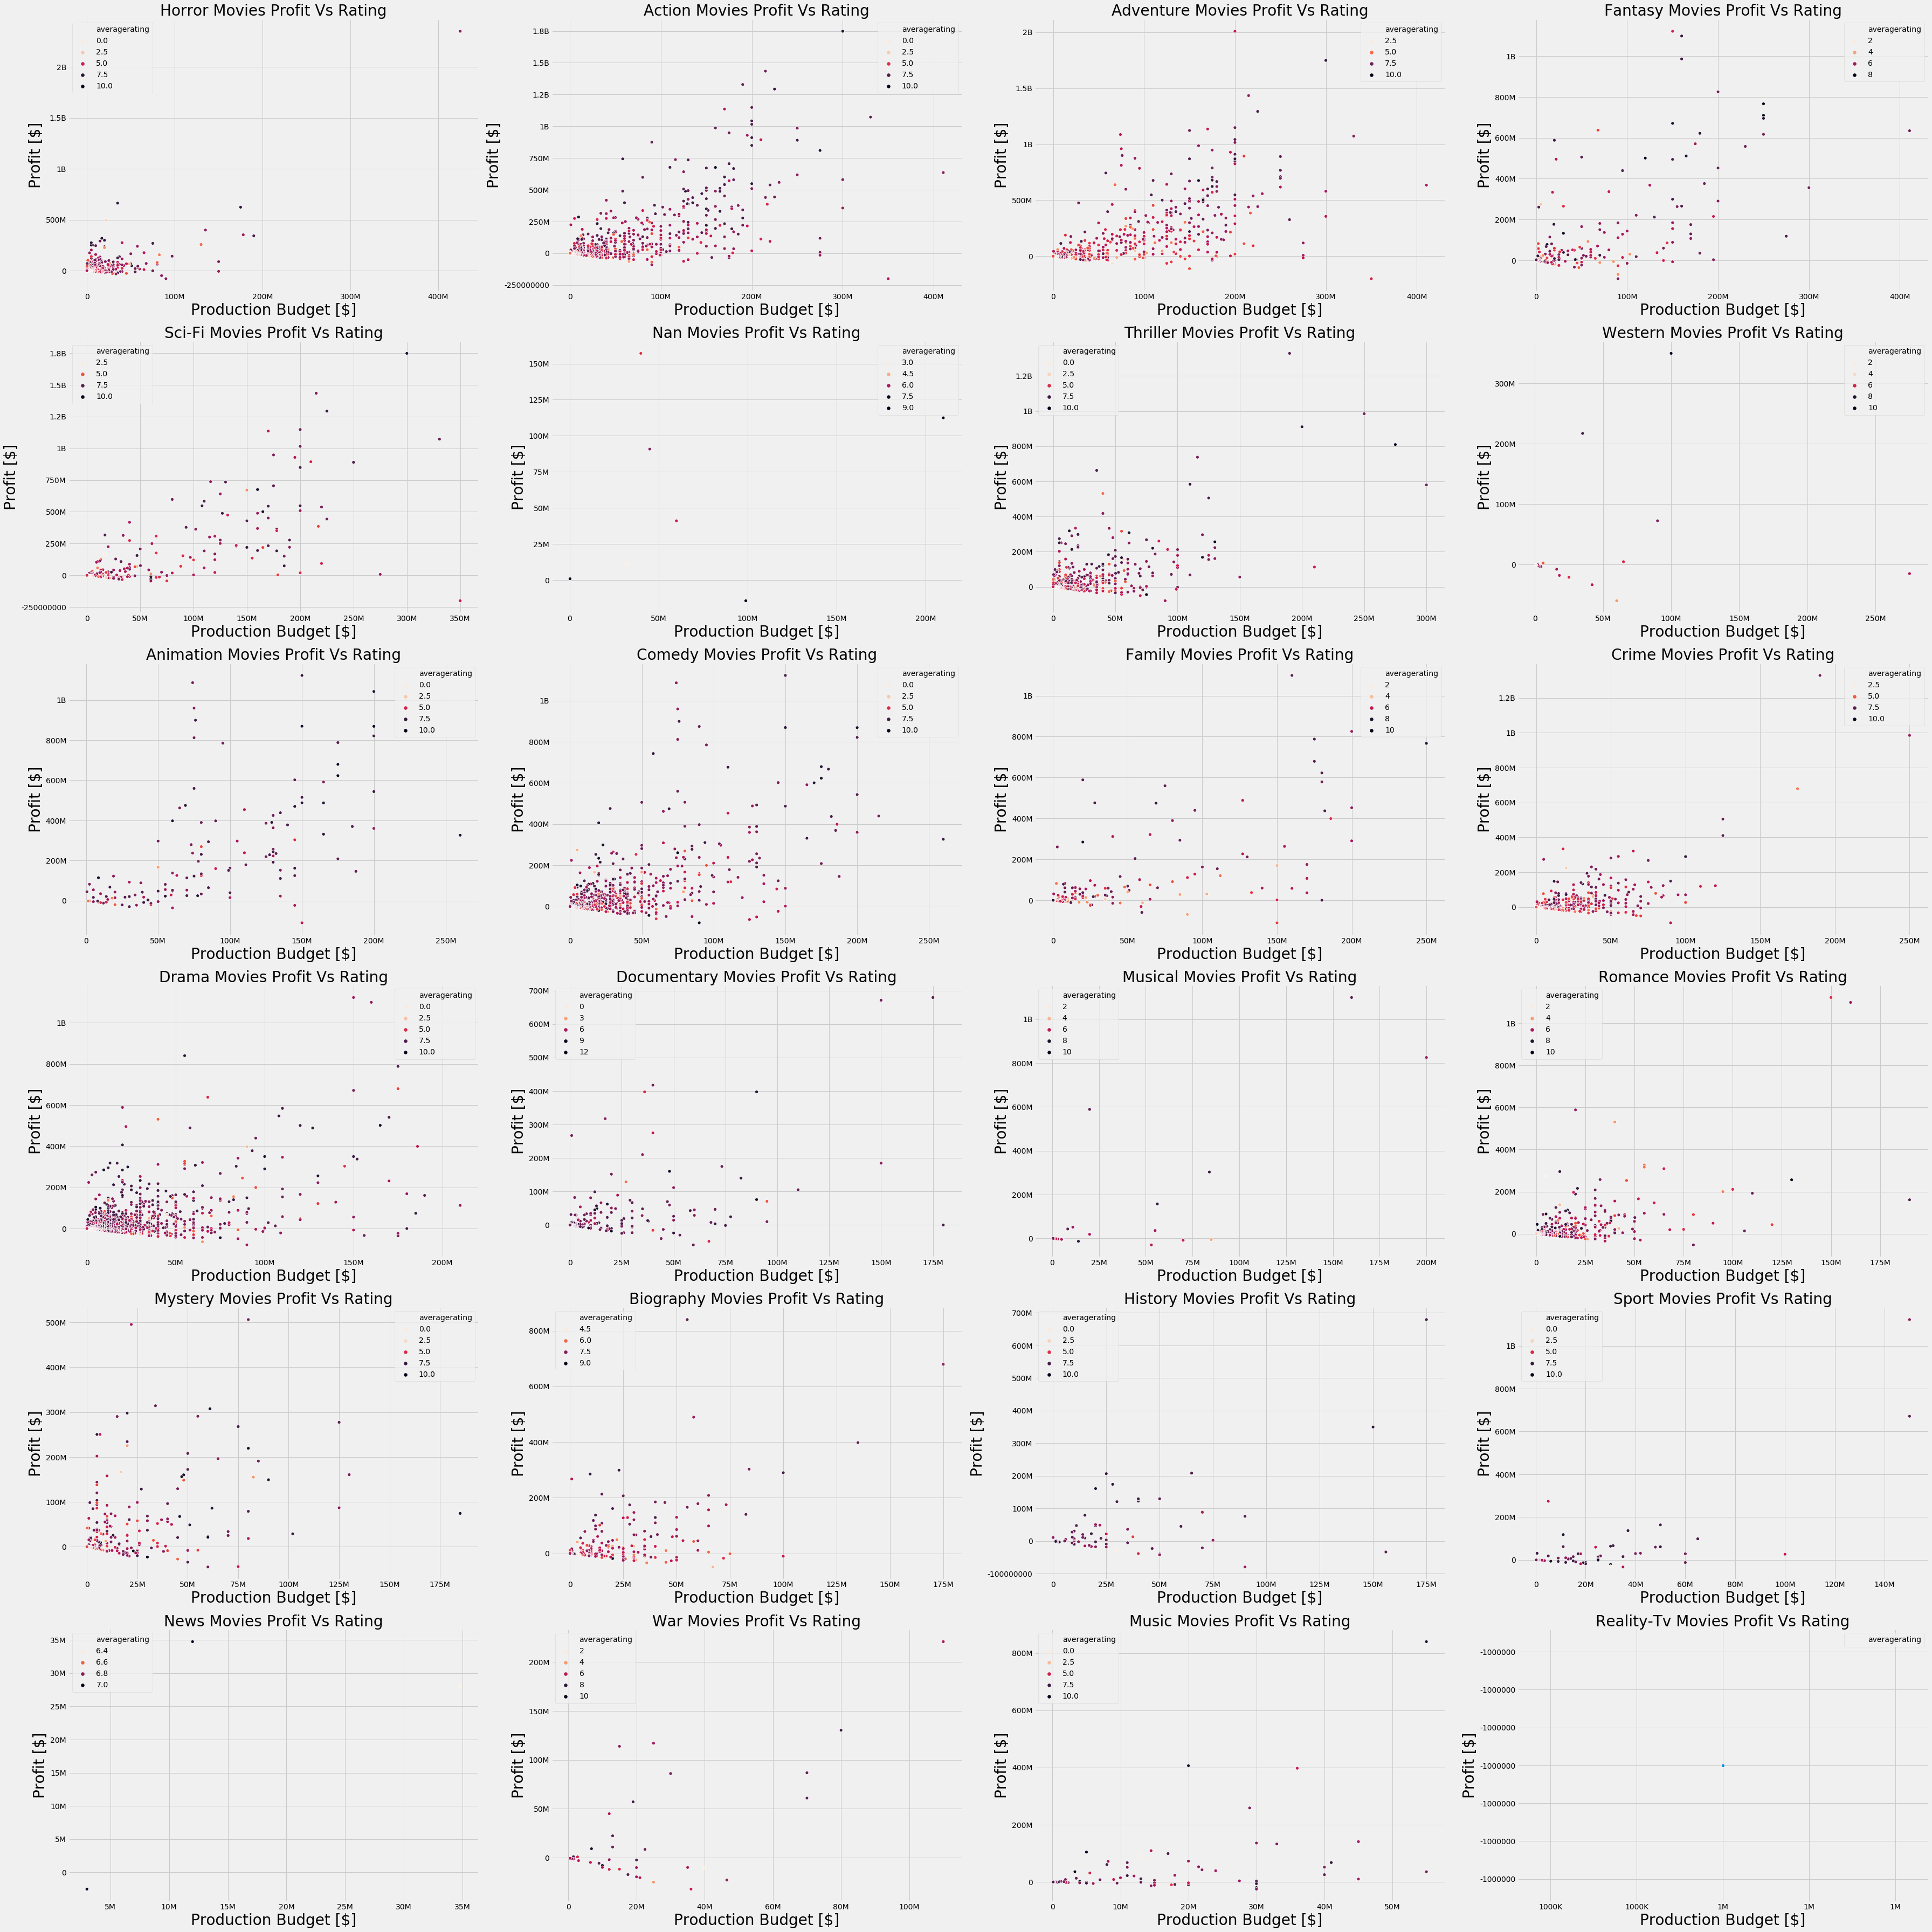

In [20]:
# Defeine a function that create all out plots based on genre


def createAThing(df):
    fig = plt.figure(figsize=(50,50))
    plotnumber = 1
    for i in genresDict.keys():
        x = df.loc[df['genresCode'] % genresDict[i] == 0]['production_budget'];
        y = df.loc[df['genresCode'] % genresDict[i] == 0]['profit'];
        z = df.loc[df['genresCode'] % genresDict[i] == 0]['averagerating']
        
        ax = sns.scatterplot(x, y, ax = plt.subplot(6,4, plotnumber), hue = z, palette = 'rocket_r');
        
        ax.set_title(f'{i.title()} Movies Profit Vs Rating',fontdict = {'size' : 28})
        ax.set_xlabel('Production Budget [$]',fontdict = {'size' : 28})
        ax.set_ylabel('Profit [$]', fontdict = {'size' : 28})
        ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
        ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

#         ax.legend(np.corrcoef(x,y)[1])
        plt.tight_layout()

        
        plotnumber = plotnumber +1
createAThing(dfFinal)

<br>
<h1>
    Question 3:
</h1>
<br>
<h2>
    Who are the most profitable directors and writers overall? Per genre?
</h2>
<br>
<br>

In [21]:
#get the names of the directors and writers
dfimdbName.loc[301124,'primary_name'] = 'James Cameron'
dfimdbName.loc[452518,'primary_name'] = 'James Cameron'
dfimdbName['isTopDirector'] = dfimdbName['nconst'].isin(dfFinal['directors'])
temp = dfimdbName.loc[dfimdbName['isTopDirector']]
dfFinal2 = dfFinal.merge(temp, how='left', left_on = 'directors', right_on = 'nconst')
dfFinal2.head(1)


id release_date   movie  production_budget  domestic_gross  \
0   1   2009-12-18  Avatar          425000000       760507625   

   worldwide_gross        profit  release_year  release_month  release_day  \
0       2776345279  2.351345e+09          2009             12            4   

      tconst primary_title  start_year  runtime_minutes    genres  directors  \
0  tt1775309        Avatar      2011.0             93.0  [horror]  nm3786927   

               writers  averagerating  numvotes duplicated inDf2  genresCode  \
0  nm2179863,nm4392664            6.1      43.0      False  True           2   

      nconst   primary_name  birth_year  death_year primary_profession  \
0  nm3786927  James Cameron         NaN         NaN           director   

                known_for_titles isTopDirector  
0  tt1594549,tt1775309,tt1602612          True

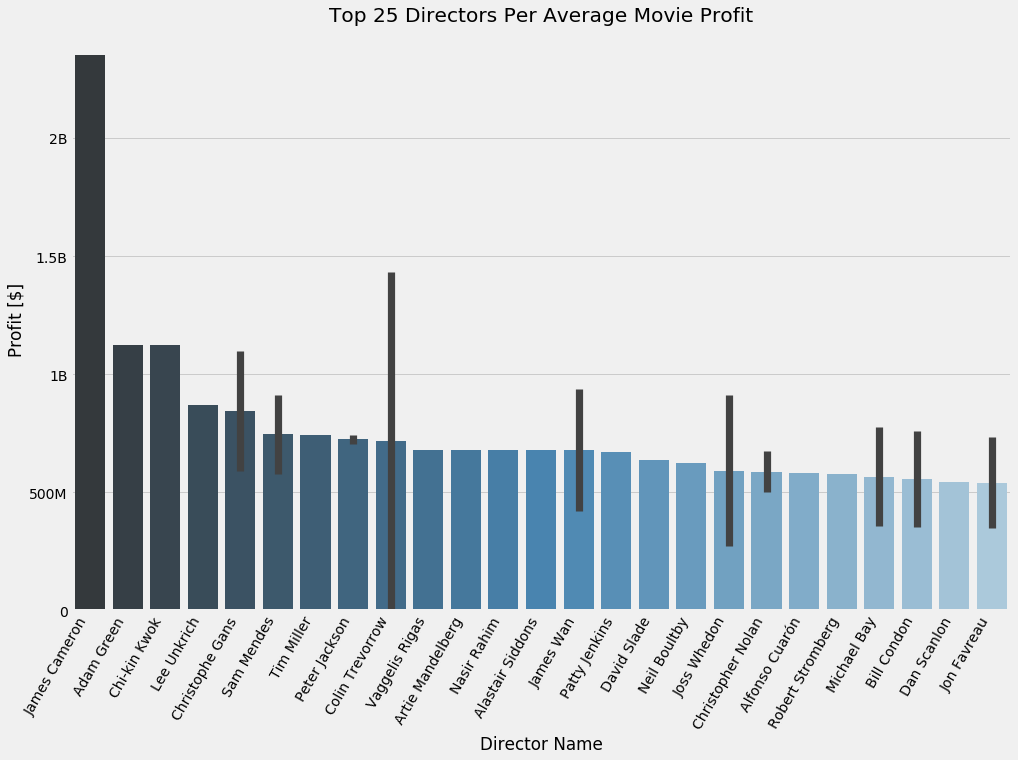

In [22]:
def createANewThing(df):
    plotnumber = 1
    fig,ax = plt.subplots(figsize = (15,10))
    topDirectors = df.groupby('primary_name').mean().sort_values('profit', ascending = False).index[:25]
    directorRows = df['primary_name'].isin(topDirectors)
#     y = df.groupby('primary_name').mean().sort_values('profit', ascending = False)['profit'][:50]
    ax = sns.barplot(data = dfFinal2[directorRows], x = 'primary_name', y = 'profit',
                     ax = plt.subplot(1,1,plotnumber), palette='Blues_d', ci = 68, order = topDirectors)
    ax.set_title('Top 25 Directors Per Average Movie Profit')
    ax.set_xlabel('Director Name')
    ax.set_ylabel('Profit [$]')
    ax.set_xticklabels(ax.get_xticklabels(), rotation= 60, fontdict={'horizontalalignment':'right'});
    ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

    plotnumber = plotnumber +1

createANewThing(dfFinal2)

In [23]:
# Get the top writers
dfimdbName['isTopWriter'] = dfimdbName['nconst'].isin(dfFinal['writers'])
temp = dfimdbName.loc[dfimdbName['isTopWriter']]
dfFinal3 = dfFinal.merge(temp, how='left', left_on = 'writers', right_on = 'nconst')
dfFinal3.head(1)


id release_date   movie  production_budget  domestic_gross  \
0   1   2009-12-18  Avatar          425000000       760507625   

   worldwide_gross        profit  release_year  release_month  release_day  \
0       2776345279  2.351345e+09          2009             12            4   

      tconst primary_title  start_year  runtime_minutes    genres  directors  \
0  tt1775309        Avatar      2011.0             93.0  [horror]  nm3786927   

               writers  averagerating  numvotes duplicated inDf2  genresCode  \
0  nm2179863,nm4392664            6.1      43.0      False  True           2   

  nconst primary_name  birth_year  death_year primary_profession  \
0    NaN          NaN         NaN         NaN                NaN   

  known_for_titles isTopDirector isTopWriter  
0              NaN           NaN         NaN

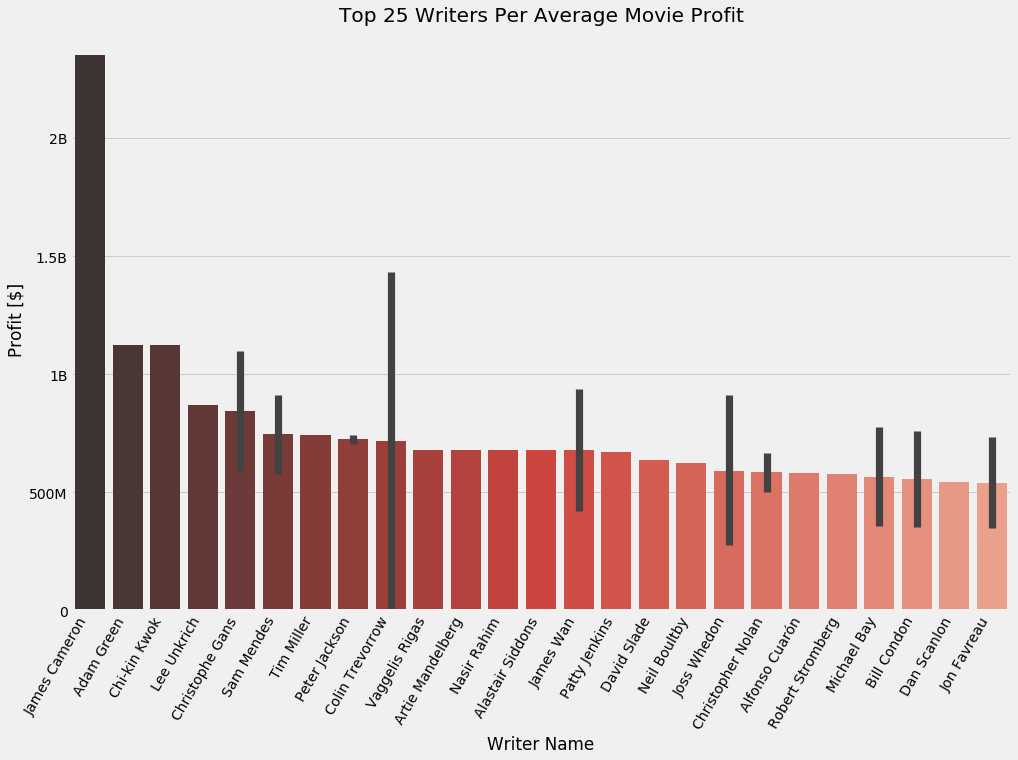

In [24]:
def createANewThing(df):
    plotnumber = 1
    fig,ax = plt.subplots(figsize = (15,10))
    topWriters = df.groupby('primary_name').mean().sort_values('profit', ascending = False).index[:25]
    writerRows = df['primary_name'].isin(topWriters)
#     y = df.groupby('primary_name').mean().sort_values('profit', ascending = False)['profit'][:50]
    ax = sns.barplot(data = dfFinal2[writerRows], x = 'primary_name', y = 'profit',
                     ax = plt.subplot(1,1,plotnumber), palette='Reds_d', ci = 68, order = topWriters)
    ax.set_title('Top 25 Writers Per Average Movie Profit')
    ax.set_xlabel('Writer Name')
    ax.set_ylabel('Profit [$]')
    ax.set_xticklabels(ax.get_xticklabels(), rotation= 60, fontdict={'horizontalalignment':'right'});
    ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

    plotnumber = plotnumber +1

createANewThing(dfFinal2)

<br>
<h2>
    Answer for Question 3:
</h2>
<p>
    The above graphs give a short list of both writers and directors who have have had vast commercial success. By averaging the profits accross their movies, we cut down on fluke victories. Every name in the visuals should be considered, with special attention given to those with existing report.  
<br>
    Note that in both catagories, people without an error bar only have one movie in this genre category. 
</p>
<br>
<br>

<h3>
    In Depth Analysis for Question 3
</h3>

In [115]:
#get the names of the directors and writers
dfimdbName.loc[301124,'primary_name'] = 'James Cameron'
dfimdbName.loc[452518,'primary_name'] = 'James Cameron'
dfimdbName['isTopDirector'] = dfimdbName['nconst'].isin(dfFinal['directors'])
temp = dfimdbName.loc[dfimdbName['isTopDirector']]
dfFinal2 = dfFinal.merge(temp, how='left', left_on = 'directors', right_on = 'nconst')
dfFinal2.head(1)

id release_date     movie  production_budget  domestic_gross  \
0  95   2020-12-31  Moonfall          150000000               0   

   worldwide_gross       profit  release_year  release_month  release_day  \
0                0 -150000000.0          2020             12            3   

  tconst primary_title  start_year  runtime_minutes genres directors writers  \
0    NaN           NaN         NaN              NaN  [nan]       NaN     NaN   

   averagerating  numvotes duplicated inDf2  genresCode nconst primary_name  \
0            NaN       NaN        NaN   NaN          13    NaN          NaN   

   birth_year  death_year primary_profession known_for_titles isTopDirector  \
0         NaN         NaN                NaN              NaN           NaN   

  isTopWriter  
0         NaN

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:411: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  ax.set_xlim(-.5, len(self.plot_data) - .5, auto=None)


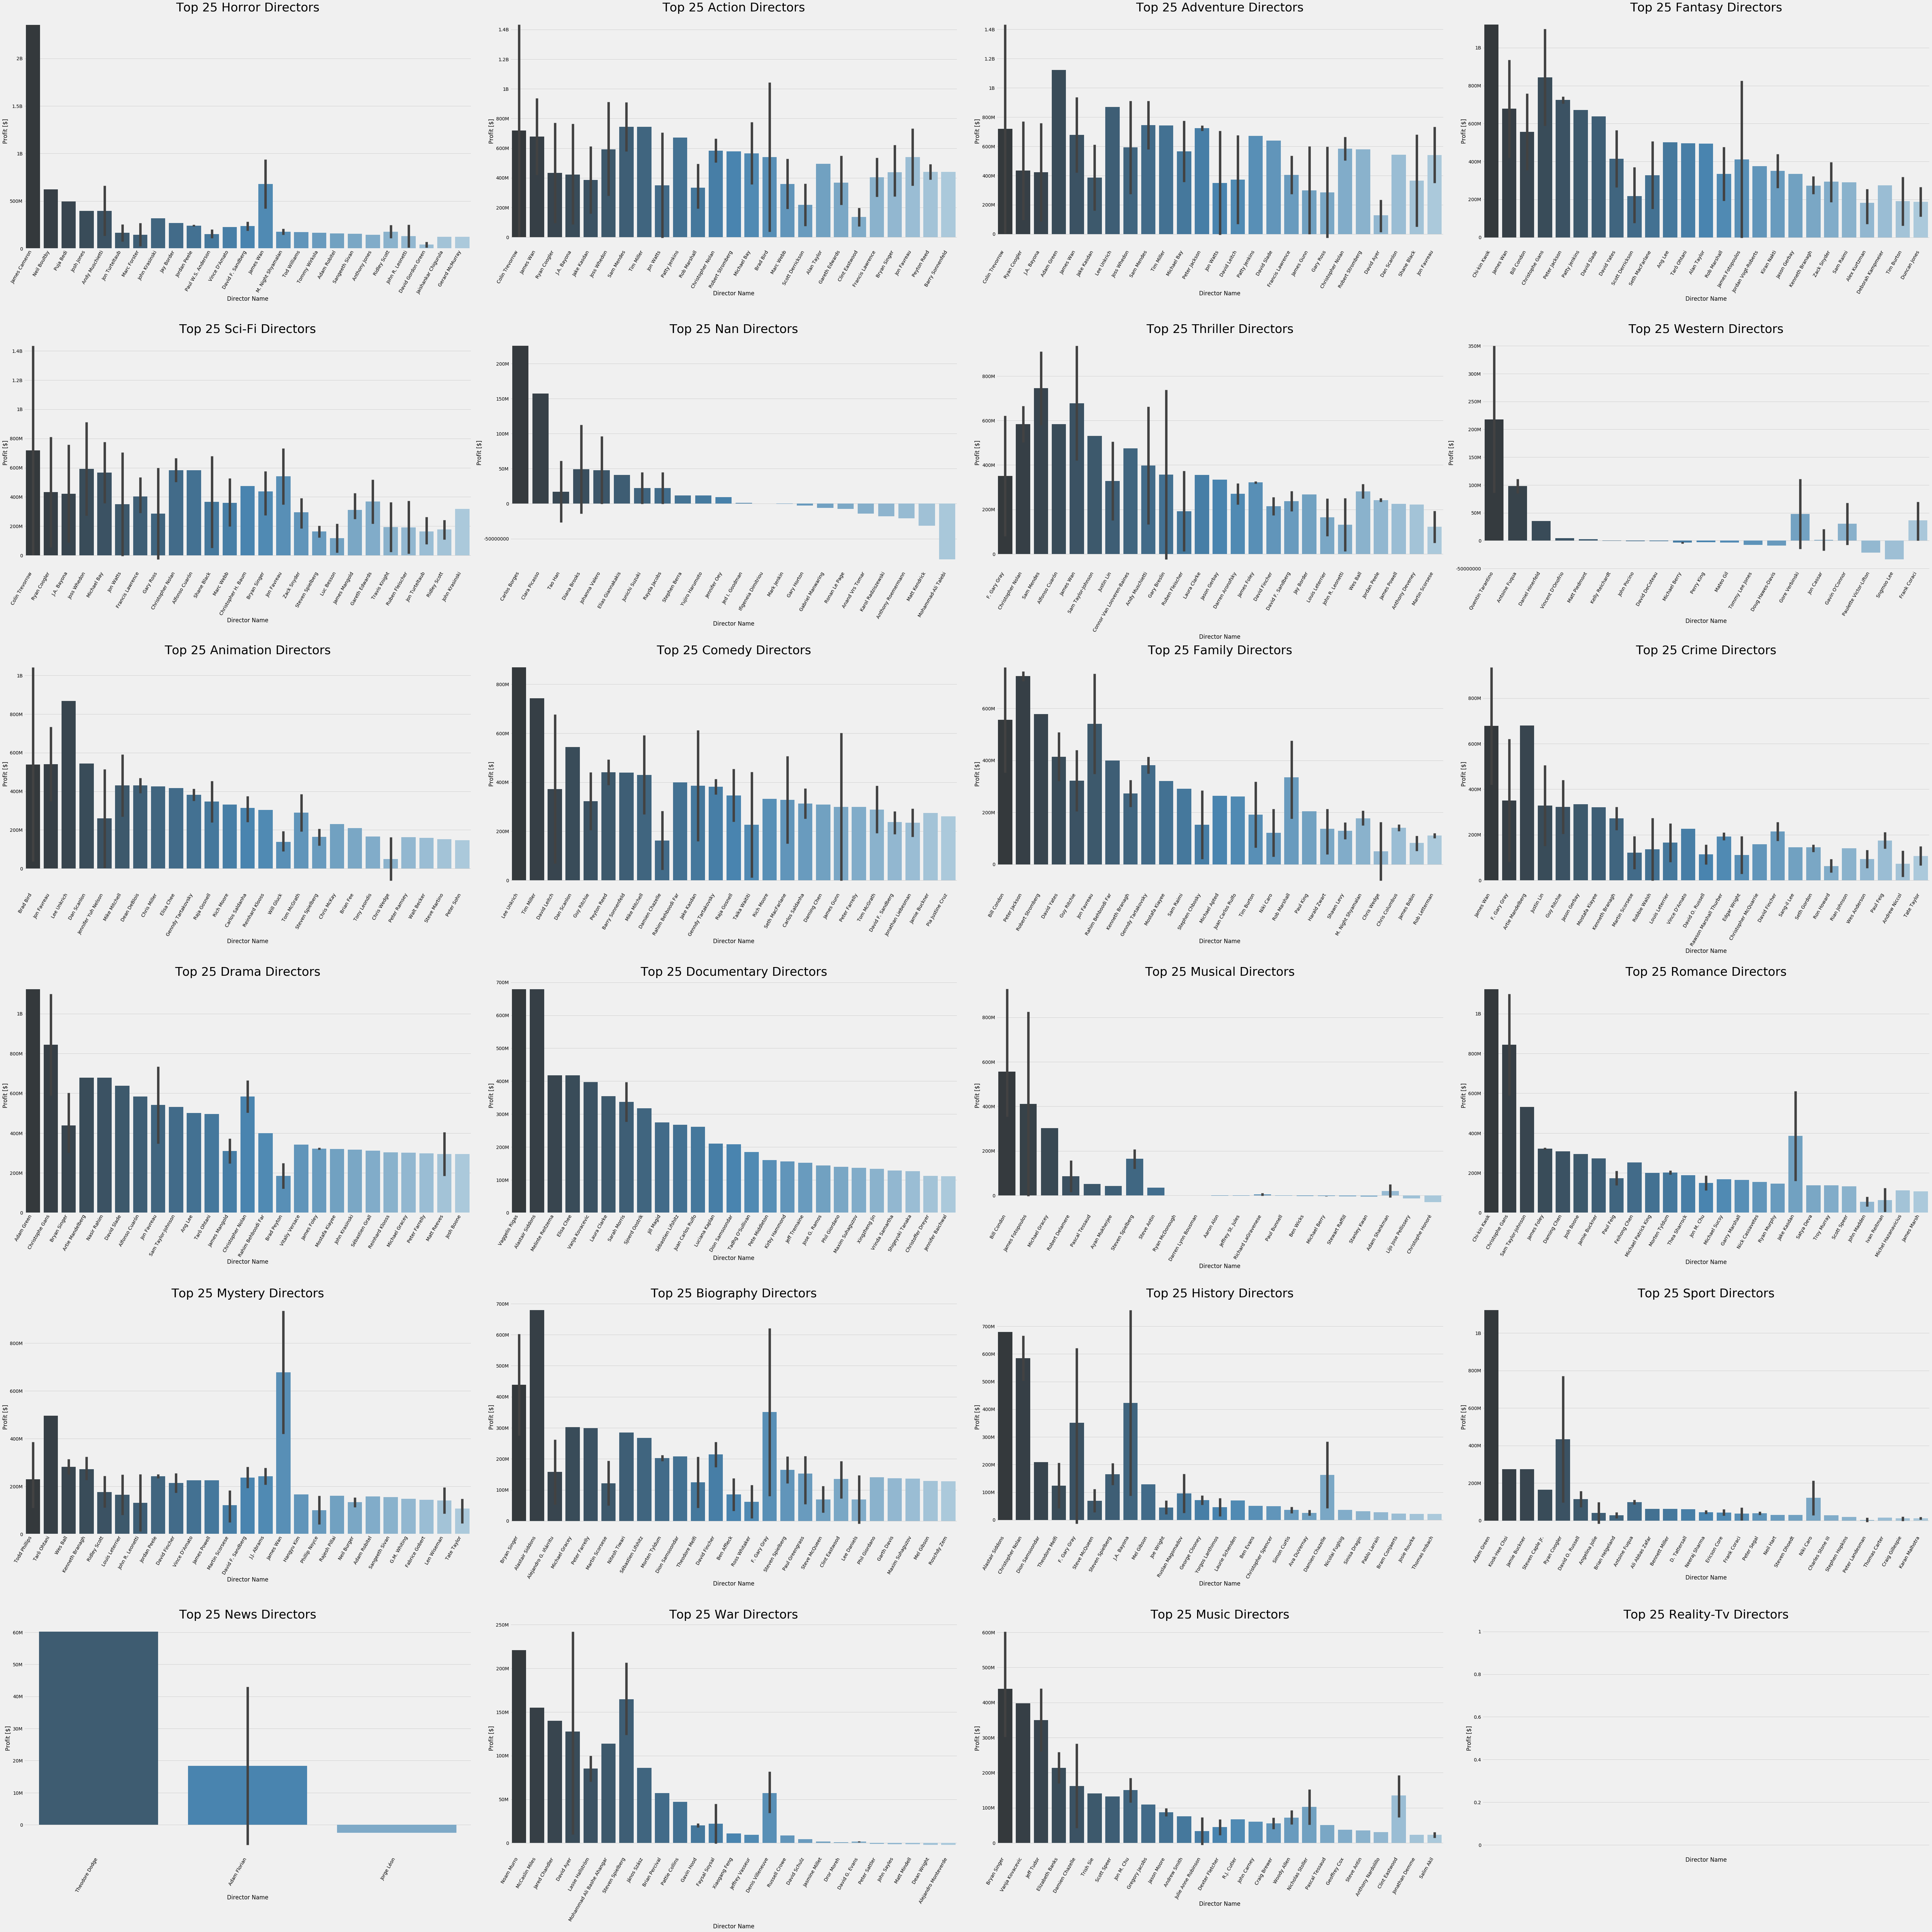

In [116]:
def createANewThing(df):
    plotnumber = 1
    fig,ax = plt.subplots(figsize = (80,80))
    for i in genresDict.keys():
        topDirectors = df.loc[df['genresCode'] % genresDict[i] == 0].groupby('primary_name').mean().sort_values('profit', ascending = False).index[:25]
        directorRows = df['primary_name'].isin(topDirectors)
        thing = df.loc[directorRows].sort_values('profit', ascending = False)
        ax = sns.barplot(data = thing, x = 'primary_name', y = 'profit',
                         ax = plt.subplot(6,4,plotnumber), palette='Blues_d', ci = 68, order = topDirectors)
        ax.set_title(f'Top 25 {i.title()} Directors', fontdict = {'fontsize':36})
        ax.set_xlabel('Director Name')
        ax.set_ylabel('Profit [$]')
        ax.set_xticklabels(ax.get_xticklabels(), rotation= 60, fontdict={'horizontalalignment':'right'});
        ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

        plotnumber = plotnumber +1
    plt.tight_layout()

createANewThing(dfFinal2)

<br>
<p>
    This is a nice working list of the successful directors in each genres. Note that all people without error bars have only had one massive commercial success. But, now that we have a short list, we have a manageable amount of follow up research. Lets move on to the writers.
</p>
<br>
<br>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:411: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  ax.set_xlim(-.5, len(self.plot_data) - .5, auto=None)


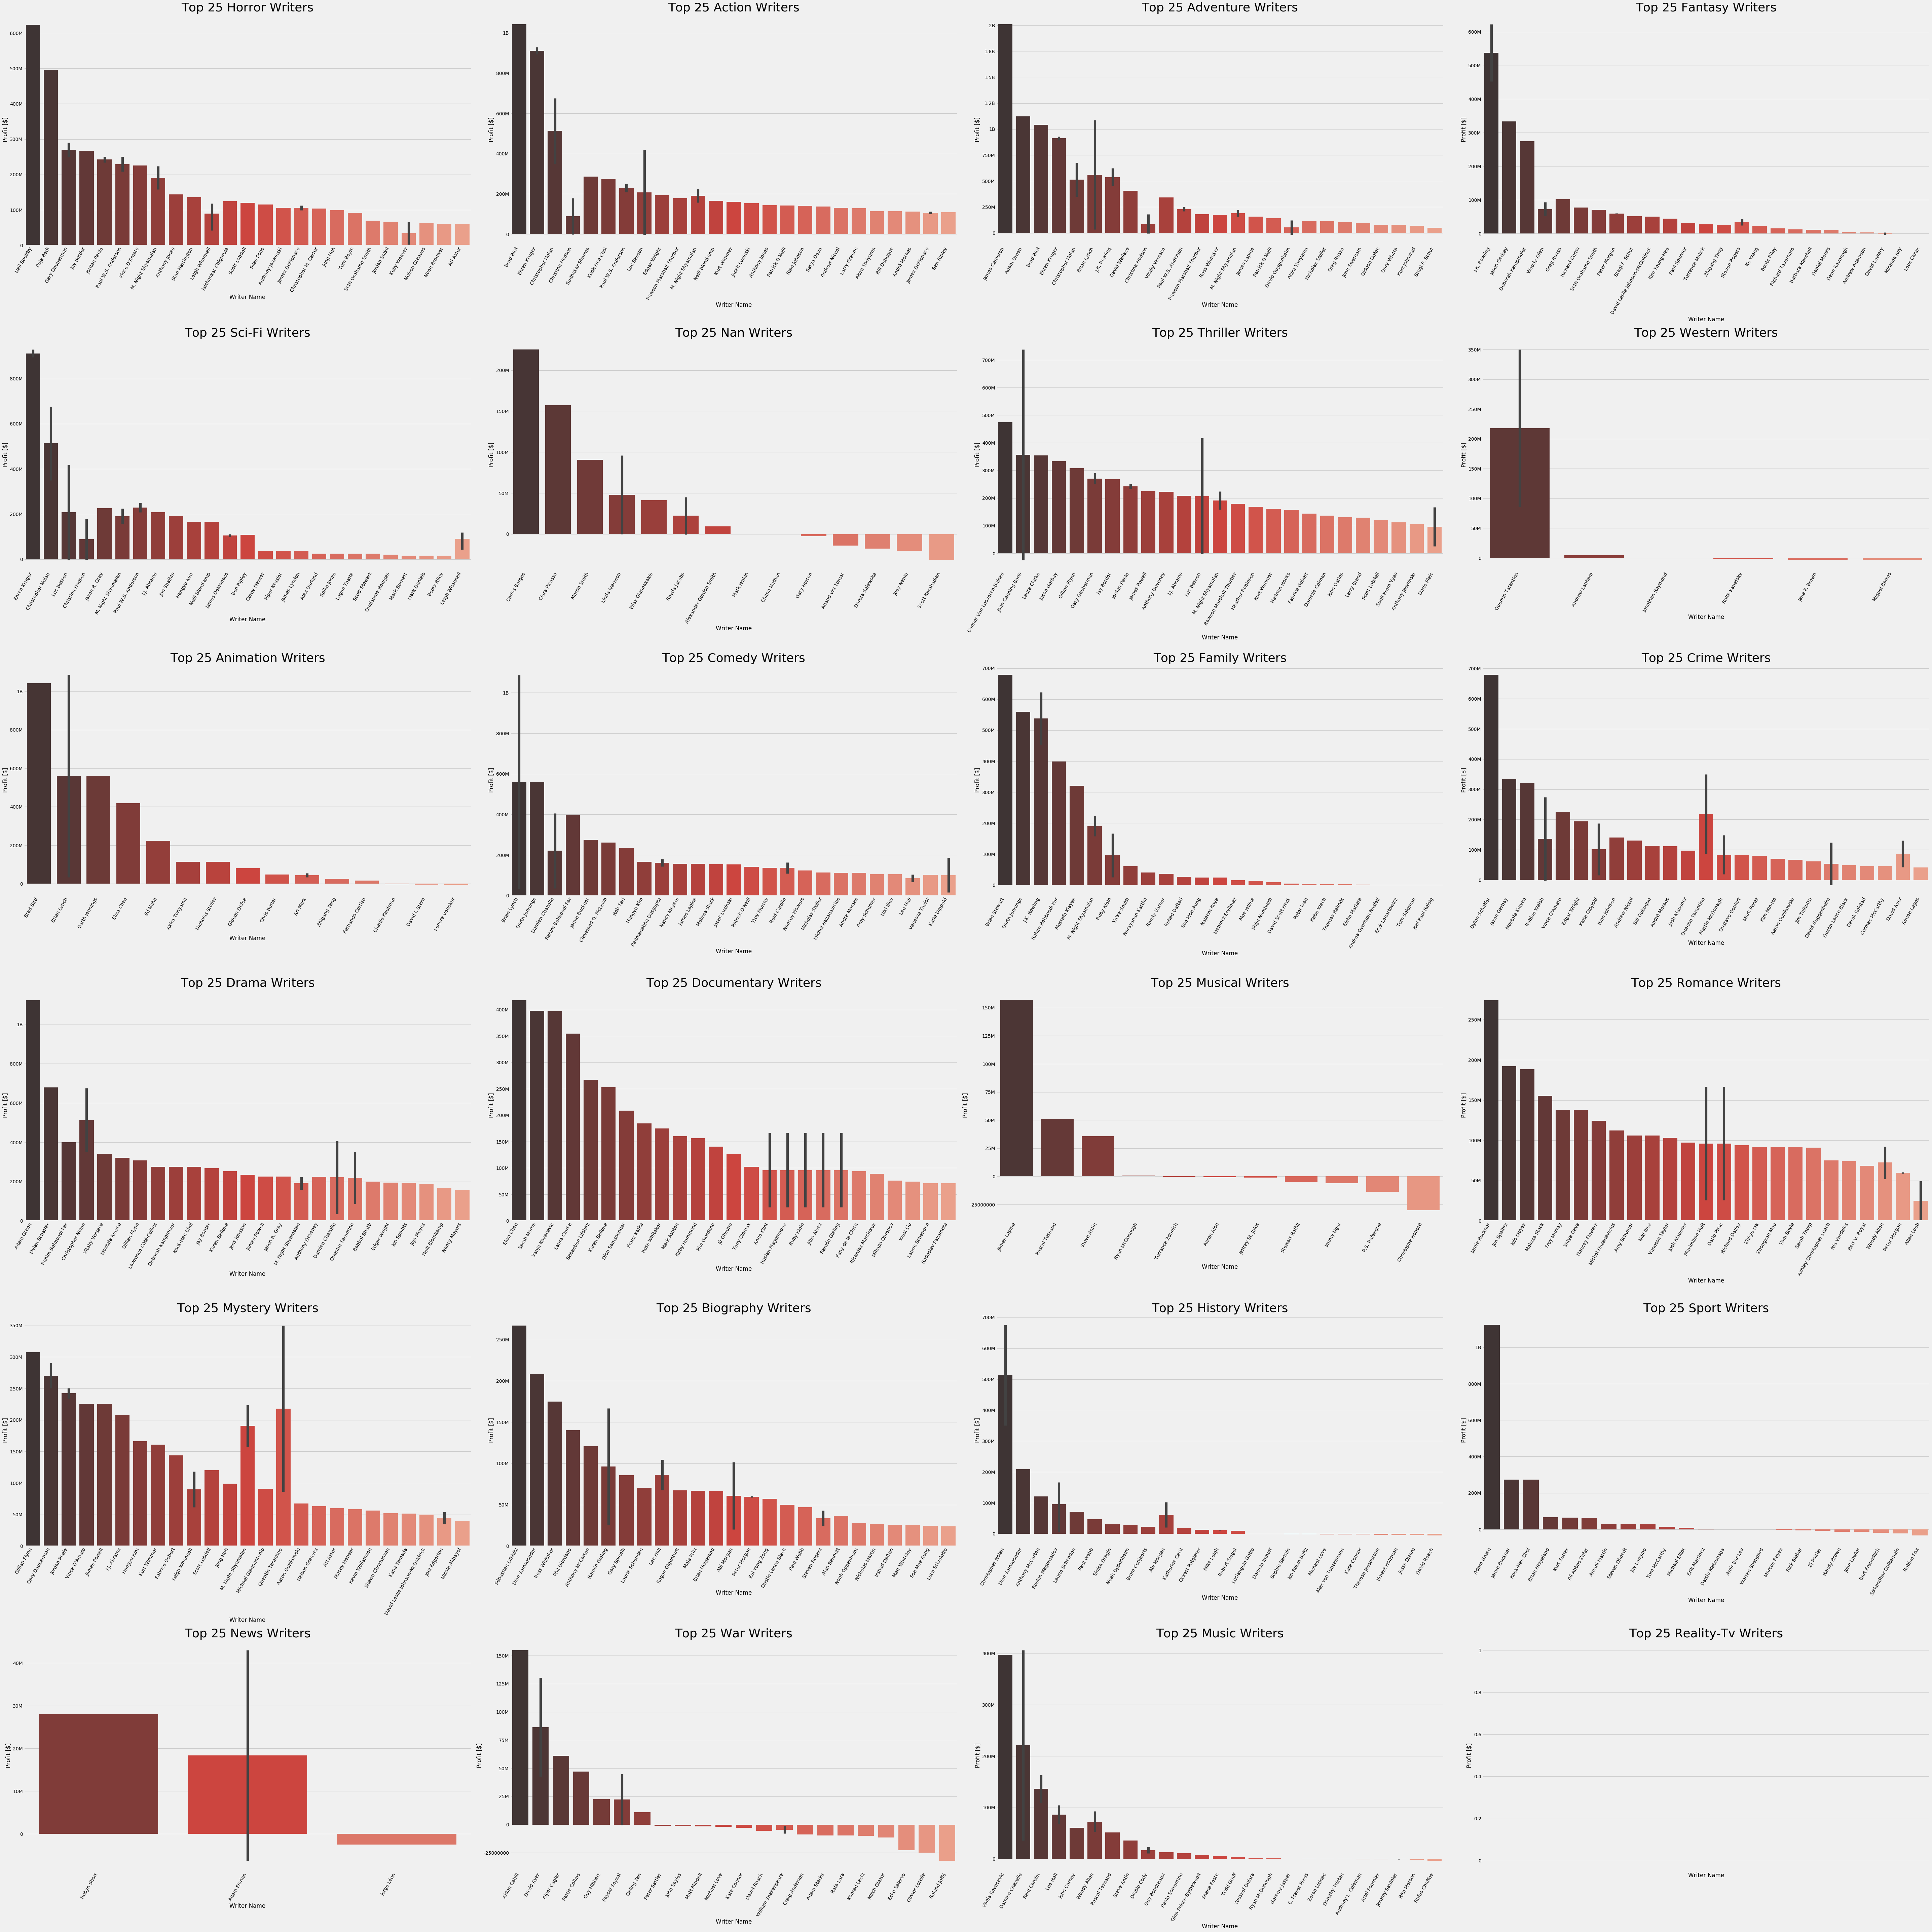

In [27]:
dfimdbName['isTopWriter'] = dfimdbName['nconst'].isin(dfFinal['writers'])
temp = dfimdbName.loc[dfimdbName['isTopWriter']]
dfFinal3 = dfFinal.merge(temp, how='left', left_on = 'writers', right_on = 'nconst')

def createANewThing(df):
    plotnumber = 1
    fig,ax = plt.subplots(figsize = (80,80))
    for i in genresDict.keys():
        topWriters = df.loc[df['genresCode'] % genresDict[i] == 0].groupby('primary_name').mean().sort_values('profit', ascending = False).index[:25]
        writerRows = df['primary_name'].isin(topWriters)
        ax = sns.barplot(data = df[writerRows].sort_values('profit', ascending = False), x = 'primary_name', y = 'profit',
                         ax = plt.subplot(6,4,plotnumber), palette='Reds_d', ci = 68, order = topWriters)
        ax.set_title(f'Top 25 {i.title()} Writers', fontdict = {'fontsize':36})
        ax.set_xlabel('Writer Name')
        ax.set_ylabel('Profit [$]')
        ax.set_xticklabels(ax.get_xticklabels(), rotation= 60, fontdict={'horizontalalignment':'right'});
        ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

        plotnumber = plotnumber +1
    plt.tight_layout()

createANewThing(dfFinal3)

<br>
<p>
    Here we note the same possibility of having one hit wonder writers. 
</p>
<br>
<br>

<h1>
    General Knowledge:
</h1>
<p>
    The following information seeks to give context to more overarching dynamics within the movie industry. They should be considered when approaching a major project but are not necessarily the most important factors. 
</p>

<h2>
    Movie profitability over time
</h2>
<p>
    The following graph is a rough summary of the movie industries profitability broken down by year
</p>

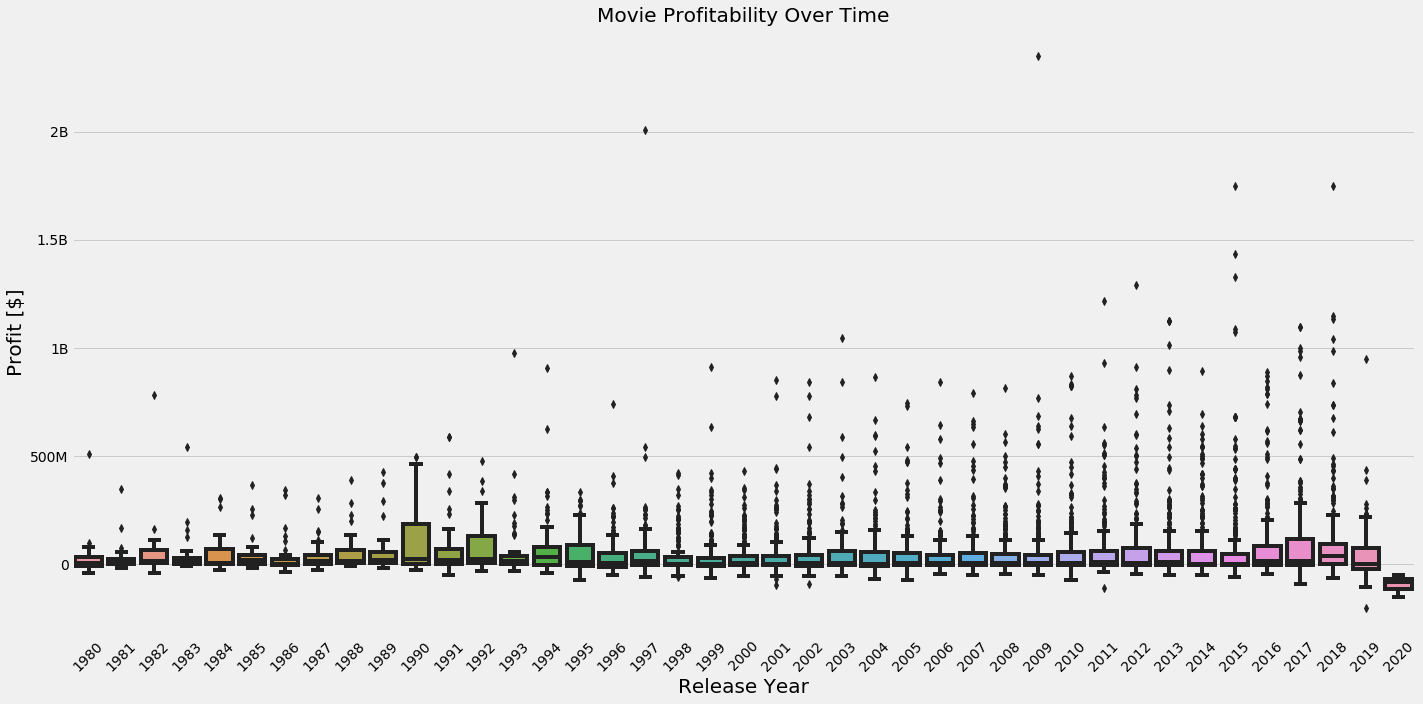

In [28]:
dfFinal.sort_values('release_year',ascending = False, inplace = True)
fig,ax = plt.subplots(figsize = (20,10),
                      ncols = 1, nrows = 1)
x = dfFinal['release_year'].loc[dfFinal['release_year'] >= 1980]
y = dfFinal['profit'].loc[dfFinal['release_year'] >= 1980]
ax = sns.boxplot(x = x, y = y);
ax.set_title('Movie Profitability Over Time')
ax.set_xlabel('Release Year', fontdict = {'size' : 20})
ax.set_ylabel('Profit [$]', fontdict = {'size' : 20});
ax.set_xticklabels(sorted(x.unique()), rotation =45, fontdict={'horizontalalignment':'center'});
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.tight_layout()


<br>
<br>
<p>
    The general trend appears to be mostly flat overall. In more recent years, there have been many more block busters as represented in the higher 75% as well as the number of high grossing outliers in the past decade. It's worth pointing out that at the time of this analysis COVID-19 has decimated the movie industy going into 2020. While the bulk of this notebook address the historical trands of the movie industry, <strong>it is highly recomended that Microsoft does not invest substantially in the industry until the long term effects of COVID-19 are made less opaque.</strong>
</p>
<br>

<h2>
    Movie Ratings
</h2>
<p>
    There are several awards related to overal movie accredidation. It should be noted that if prestigue is the overal goal of the program then alternative summary statistics should be explored. The follow graph shows that overal move quality ratings are substantially worse predictors of commercial success than movie budget.
</p>

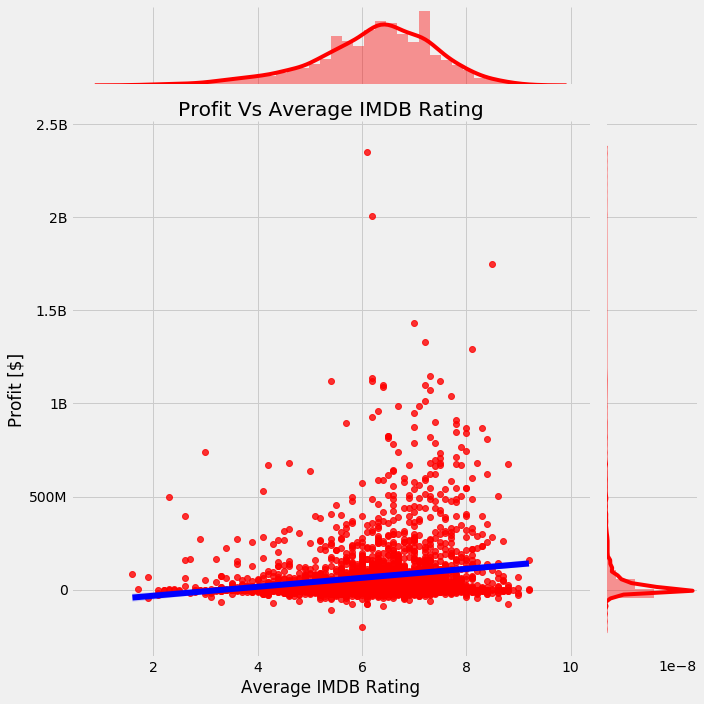

In [29]:
x = dfFinal['averagerating']
y = dfFinal['profit']


# fig,ax = plt.subplots(figsize = (10,10),
#                       ncols = 1, nrows = 1)
sns.jointplot(x=x, y=y,kind = 'reg', height = 10, color = 'red', joint_kws = {'line_kws' : {'color':'blue'}});
ax = plt.gca()
ax.set_title('Profit Vs Average IMDB Rating');
ax.set_xlabel('Average IMDB Rating')
ax.set_ylabel('Profit [$]')
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.tight_layout()
# ax.legend([f"The Correlation is {np.corrcoef(dfFinal['averagerating'], dfFinal['profit'])[0][1]}"])

<h2>
    Movie Release Dates
</h2>
<p>
    Overall, it appears that there's isn't any industry wide benefit to releasing a movie on any given month or day of the week. However, it's clear that there's a strong preference for movies coming out on Friday. In general, Friday release dates don't have any material benefit but because it appears to be an industry standard, there is also a strong preference for Friday among the most profitable movies. I would also encorage Microsoft to release any movies on fridays. Following the industry standard is smart in this case because there may not be a way to determine if block busters make more money because they come out on Friday or if blockbusters are chosen to be released on Friday and they were going to make money anyways.
</p>

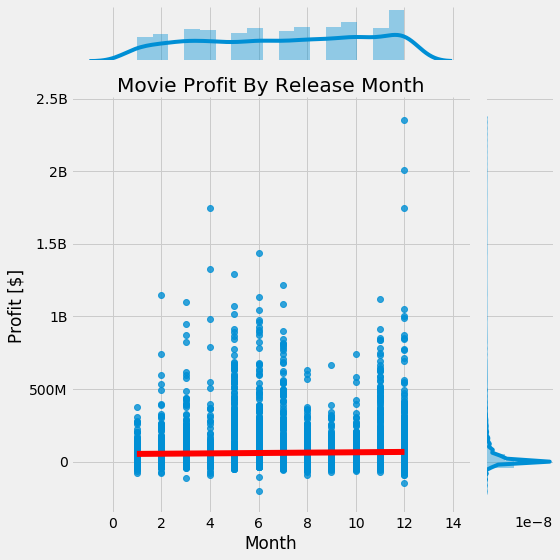

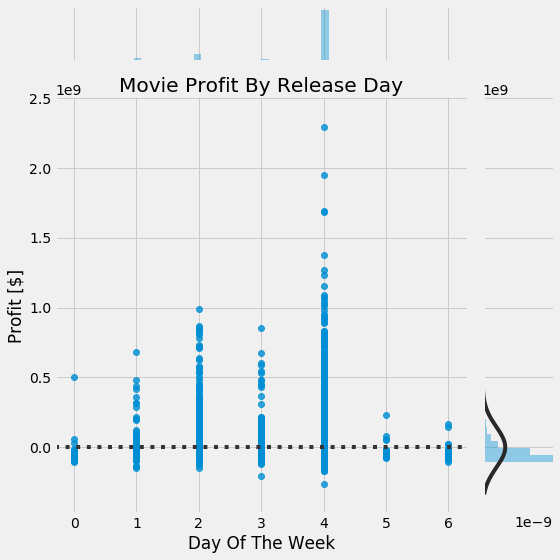

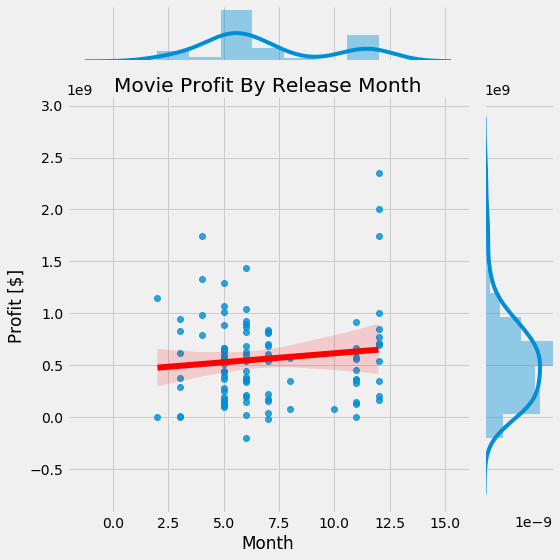

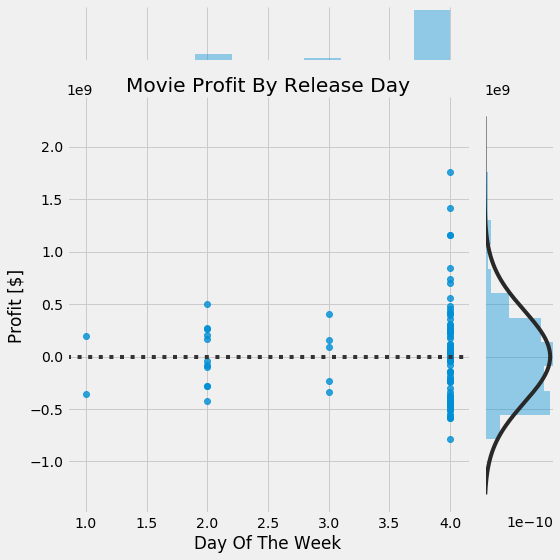

In [30]:
#https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas

thing1 = sns.jointplot(x = 'release_month', y ='profit', data = df2,kind = 'reg', height =8,joint_kws = {'line_kws' : {'color':'red'}})
ax = plt.gca()
ax.set_title('Movie Profit By Release Month')
ax.set_xlabel('Month')
ax.set_ylabel('Profit [$]')        
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.tight_layout()

thing2 = sns.jointplot(x = 'release_day', y ='profit', data = df2, height = 8,kind = 'resid' )
ax1 = plt.gca()
ax1.set_title('Movie Profit By Release Day')
ax1.set_xlabel('Day Of The Week')
ax1.set_ylabel('Profit [$]')
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.tight_layout()

thing3 = sns.jointplot(x = 'release_month', y ='profit', data = df2[:100], height =8, kind = 'reg',joint_kws = {'line_kws' : {'color':'red'}} )
ax2 = plt.gca()
ax2.set_title('Movie Profit By Release Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Profit [$]')
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.tight_layout()

thing4 = sns.jointplot(x = 'release_day', y ='profit', data = df2[:100], height = 8, kind = 'resid' )
ax3 = plt.gca()
ax3.set_title('Movie Profit By Release Day')
ax3.set_xlabel('Day Of The Week')
ax3.set_ylabel('Profit [$]')
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.tight_layout()



<h1>
    Recomendations:
</h1><br><br>

<h2>
Invest more than 120 million and less than 300 million in a movie 
</h2>

* Movies with a budget of 120 million or more make up aroung 5% of all films, but account for 34% of the industries total revenue

<br><br>

<h2>
Make one of the following types of Movies:
</h2>

* Action
* Adventure
* Animation
* Family
* Fantasy
* Musical
* Sci-Fi
<br><br>

<h2>
Hire writers and directors from the above lists in the chosen genre 
</h2>




<h1>
    Refrences:
</h1>
<h2>
    There are lots of folks in the open source community who make the world go round. Here are the ones I used in this notebook. Go check them out!
</h2>

* https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas
* http://jonathansoma.com/lede/data-studio/classes/small-multiples/long-explanation-of-using-plt-subplots-to-create-small-multiples/
* https://dfrieds.com/data-visualizations/how-format-large-tick-values.html